In [1]:
# prompt: please mount my drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import StandardScaler


In [3]:
data = pd.read_csv("drive/MyDrive/Dataset/cassava_dataset.csv", low_memory=False)
weather_data = pd.read_excel("drive/MyDrive/Dataset/weather_data.xls")

w_df = weather_data.copy()

df = data.copy()
pd.concat([df.head(5), df.sample(5), df.tail(5)])

,year,programName,trial,studyDesign,plotWidth,plotLength,fieldSize,plantingDate,harvestDate,location,...,sprtct3,sprout,Starch,sg,stmcol,stemwt,storgshp,rtsz,tyld,yldQ
0,2009,IITA,09ayt49whtrtIB,RCBD,NaN,NaN,NaN,NaN,NaN,Ibadan,...,NaN,1.00,NaN,NaN,NaN,NaN,2.0,3.0,8.10,NaN
1,2009,IITA,09ayt49whtrtIB,RCBD,NaN,NaN,NaN,NaN,NaN,Ibadan,...,NaN,0.80,NaN,NaN,NaN,NaN,2.0,7.0,20.60,NaN
2,2009,IITA,09ayt49whtrtIB,RCBD,NaN,NaN,NaN,NaN,NaN,Ibadan,...,NaN,1.00,NaN,NaN,NaN,NaN,2.0,5.0,15.00,NaN
3,2009,IITA,09ayt49whtrtIB,RCBD,NaN,NaN,NaN,NaN,NaN,Ibadan,...,NaN,1.00,NaN,NaN,NaN,NaN,2.0,5.0,12.50,NaN
4,2009,IITA,09ayt49whtrtIB,RCBD,NaN,NaN,NaN,NaN,NaN,Ibadan,...,NaN,1.00,NaN,NaN,NaN,NaN,2.0,7.0,22.50,NaN
23917,2015,NRCRI,Otobi2015TP2SET2CGM,RCBD,NaN,NaN,NaN,NaN,NaN,Otobi,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
6154,2013,IITA,13pytdiallelIB,RCBD,1.0,8.0,0.0208,2013-October-22,2014-September-24,Ibadan,...,NaN,0.60,NaN,NaN,NaN,NaN,2.0,5.0,10.00,NaN
24618,2015,NRCRI,Umudike 2015TP2SET3CGM,RCBD,NaN,NaN,NaN,NaN,NaN,Umudike,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1875,2012,IITA,12ayt66pdwrtIB,RCBD,4.0,5.6,NaN,2012-August-31,2013-August-01,Ibadan,...,NaN,1.00,NaN,NaN,NaN,NaN,2.0,5.0,69.00,NaN
21417,2019,IITA,19ayt30highTCIB,Alpha,4.0,5.5,0.2020,2019-September-20,NaN,Ibadan,...,26.0,0.87,NaN,NaN,NaN,NaN,2.0,5.0,27.63,NaN


In [4]:
def __describe_data(data):
  display(data.describe(include = "all").T)
  display(data.describe(include = "float").T)
  display(data.describe(include = "object").T)

__describe_data(df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,24637.0,NaN,NaN,NaN,2015.15631,2.304484,1996.0,2013.0,2015.0,2017.0,2022.0
programName,24637,2,IITA,22920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trial,24637,454,16clonalevalhighTCBIB,1363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studyDesign,24637,4,RCBD,13629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plotWidth,21955.0,NaN,NaN,NaN,2.383739,1.696465,1.0,1.0,1.0,4.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
stemwt,4.0,NaN,NaN,NaN,6.425,4.35,0.8,4.4,6.95,8.975,11.0
storgshp,19909.0,NaN,NaN,NaN,2.140841,0.497991,1.0,2.0,2.0,2.0,7.0
rtsz,19555.0,NaN,NaN,NaN,4.330095,1.318708,2.0,3.0,5.0,5.0,7.0
tyld,15015.0,NaN,NaN,NaN,25.239272,20.601212,0.0,13.8,22.5,32.6,1512.5


,count,mean,std,min,25%,50%,75%,max
plotWidth,21955.0,2.383739,1.696465,1.0,1.0000,1.000,4.00000,16.0
plotLength,21955.0,4.909387,1.727796,2.5,3.5000,5.500,5.50000,20.0
fieldSize,15988.0,0.328239,0.320640,0.0,0.1024,0.215,0.58975,7.2
row_num,2351.0,7.468737,5.894370,1.0,3.0000,6.000,11.00000,34.0
col_num,2132.0,7.424015,8.952943,1.0,2.0000,4.000,7.00000,48.0
...,...,...,...,...,...,...,...,...
stemwt,4.0,6.425000,4.350000,0.8,4.4000,6.950,8.97500,11.0
storgshp,19909.0,2.140841,0.497991,1.0,2.0000,2.000,2.00000,7.0
rtsz,19555.0,4.330095,1.318708,2.0,3.0000,5.000,5.00000,7.0
tyld,15015.0,25.239272,20.601212,0.0,13.8000,22.500,32.60000,1512.5


,count,unique,top,freq
programName,24637,2,IITA,22920
trial,24637,454,16clonalevalhighTCBIB,1363
studyDesign,24637,4,RCBD,13629
plantingDate,22387,303,2015-October-20,1515
harvestDate,20970,302,2016-October-20,1515
location,24637,16,Ibadan,18851
accession,24637,10018,IITA-TMS-IBA141092,396
plotname,24637,24637,2010-ayt49whtrtIB-rep1-IITA-TMS-IBA090546,1
entryType,24637,2,test,24215
cbb3i,22344,128,0,12122


In [5]:
df.isnull().sum().sort_values(ascending = False)

stemwt         24633
cbsd12i        24631
brnhbt         24613
cmd12i         24602
cmbs           24591
               ...  
rep                0
programName        0
plotname           0
accession          0
year               0
Length: 86, dtype: int64

x

In [6]:
df.duplicated().sum()

0

In [7]:
print(df.columns)

Index(['year', 'programName', 'trial', 'studyDesign', 'plotWidth',
       'plotLength', 'fieldSize', 'plantingDate', 'harvestDate', 'location',
       'accession', 'plotname', 'rep', 'block_num', 'plot_num', 'row_num',
       'col_num', 'entryType', 'brnhbt', 'brnhlv', 'cad3i', 'cad6i', 'cad9i',
       'cad3s', 'cad6s', 'cad9s', 'cbb3i', 'cbb6i', 'cbb9i', 'cbb3s', 'cbb6s',
       'cbb9s', 'cbsd12i', 'cbsdr12s', 'cgm1', 'cgm2', 'cmbs', 'cmd1i',
       'cmd12i', 'cmd3i', 'cmd6i', 'cmd9i', 'cmd1s', 'cmd12s', 'cmd3s',
       'cmd6s', 'cmd9s', 'dmspg', 'dm', 'dmQ', 'dyld', 'fibre', 'brnht',
       'fyld', 'fshtwt', 'fstortwt', 'hi', 'vigor', 'mkrtwt', 'nmrtwt',
       'pltsk', 'petcol', 'pltarc', 'pltht', 'nohav', 'lodplt', 'rtvr',
       'nklgt', 'rtno', 'rwtair', 'rwtwat', 'rtrot', 'spgrv', 'sprtct9',
       'sprtct1', 'sprtct6', 'sprtct3', 'sprout', 'Starch', 'sg', 'stmcol',
       'stemwt', 'storgshp', 'rtsz', 'tyld', 'yldQ'],
      dtype='object')


In [8]:
print(len(df.columns))

86


In [9]:
df = df.dropna(subset=["dm","fyld","spgrv"])
df1 = df.drop(columns=['plotLength', 'plotWidth', 'hi', 'studyDesign', 'trial', 'plot_num','block_num','rep','fieldSize', 'programName','col_num','row_num'])
df1 = df1.loc[:, df.isna().mean() < .3]
df1 = df1.dropna(axis=0)
__describe_data(df1)

# df.describe()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,3561.0,NaN,NaN,NaN,2013.607975,1.887922,2011.0,2012.0,2013.0,2014.0,2022.0
plantingDate,3561,83,2013-June-03,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
harvestDate,3561,87,2014-June-04,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,3561,6,Ibadan,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accession,3561,1000,IITA-TMS-IBA090581,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plotname,3561,3561,2012-ayt32whtrtIB-rep1-IITA-TMS-IBA090546,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entryType,3561,2,test,3545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cad6i,3561.0,NaN,NaN,NaN,0.148055,0.260496,0.0,0.0,0.0,0.2,1.0
cad6s,3561.0,NaN,NaN,NaN,1.491997,0.733627,1.0,1.0,1.0,2.0,7.0
cbb3i,3561,74,0,1607,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,count,mean,std,min,25%,50%,75%,max
cad6i,3561.0,0.148055,0.260496,0.00,0.00,0.000000,0.20,1.00
cad6s,3561.0,1.491997,0.733627,1.00,1.00,1.000000,2.00,7.00
cbb6i,3561.0,0.384367,0.431537,0.00,0.00,0.180000,1.00,1.00
cbb6s,3561.0,1.799214,0.886769,1.00,1.00,2.000000,2.00,7.00
cmd1i,3561.0,0.132988,0.289641,0.00,0.00,0.000000,0.10,1.00
cmd1s,3561.0,1.416737,0.789247,0.00,1.00,1.000000,2.00,5.00
cmd6s,3561.0,1.221005,0.615134,0.00,1.00,1.000000,1.00,5.00
dmspg,3561.0,30.458660,4.398450,17.50,27.17,30.465157,33.60,65.53
dm,3561.0,29.379714,7.347795,6.80,23.90,30.000000,35.10,46.20
dyld,3561.0,6.496464,6.597420,0.30,3.20,5.300000,8.20,135.70


,count,unique,top,freq
plantingDate,3561,83,2013-June-03,169
harvestDate,3561,87,2014-June-04,169
location,3561,6,Ibadan,2818
accession,3561,1000,IITA-TMS-IBA090581,27
plotname,3561,3561,2012-ayt32whtrtIB-rep1-IITA-TMS-IBA090546,1
entryType,3561,2,test,3545
cbb3i,3561,74,0,1607
cbb3s,3561,5,1,1639
cmd3i,3561,47,0,2754
cmd6i,3561,43,0,3074


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3561 entries, 241 to 23387
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          3561 non-null   int64  
 1   plantingDate  3561 non-null   object 
 2   harvestDate   3561 non-null   object 
 3   location      3561 non-null   object 
 4   accession     3561 non-null   object 
 5   plotname      3561 non-null   object 
 6   entryType     3561 non-null   object 
 7   cad6i         3561 non-null   float64
 8   cad6s         3561 non-null   float64
 9   cbb3i         3561 non-null   object 
 10  cbb6i         3561 non-null   float64
 11  cbb3s         3561 non-null   object 
 12  cbb6s         3561 non-null   float64
 13  cmd1i         3561 non-null   float64
 14  cmd3i         3561 non-null   object 
 15  cmd6i         3561 non-null   object 
 16  cmd1s         3561 non-null   float64
 17  cmd3s         3561 non-null   object 
 18  cmd6s         3561 non-null   

In [11]:
last_10_columns = df1.columns[7:]
desired_datatype = 'float'
df1[last_10_columns] = df1[last_10_columns].astype(desired_datatype)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3561 entries, 241 to 23387
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          3561 non-null   int64  
 1   plantingDate  3561 non-null   object 
 2   harvestDate   3561 non-null   object 
 3   location      3561 non-null   object 
 4   accession     3561 non-null   object 
 5   plotname      3561 non-null   object 
 6   entryType     3561 non-null   object 
 7   cad6i         3561 non-null   float64
 8   cad6s         3561 non-null   float64
 9   cbb3i         3561 non-null   float64
 10  cbb6i         3561 non-null   float64
 11  cbb3s         3561 non-null   float64
 12  cbb6s         3561 non-null   float64
 13  cmd1i         3561 non-null   float64
 14  cmd3i         3561 non-null   float64
 15  cmd6i         3561 non-null   float64
 16  cmd1s         3561 non-null   float64
 17  cmd3s         3561 non-null   float64
 18  cmd6s         3561 non-null   

EDA: Exploratory Data Analysis

Univariate Analysis

In [12]:
def histogram_boxplot(feature, figsize=(15, 7), bins=None):
    """
    Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of f  ig (default (15,10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = False, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots

    sns.boxplot(x = feature, ax=ax_box2, showmeans=True, color='orange') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.histplot(feature, kde=True, ax=ax_hist2, edgecolor = "white") # For histogram
    ax_hist2.axvline(np.mean(feature), color='blue', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='red', linestyle='-') # Add median to the histogram

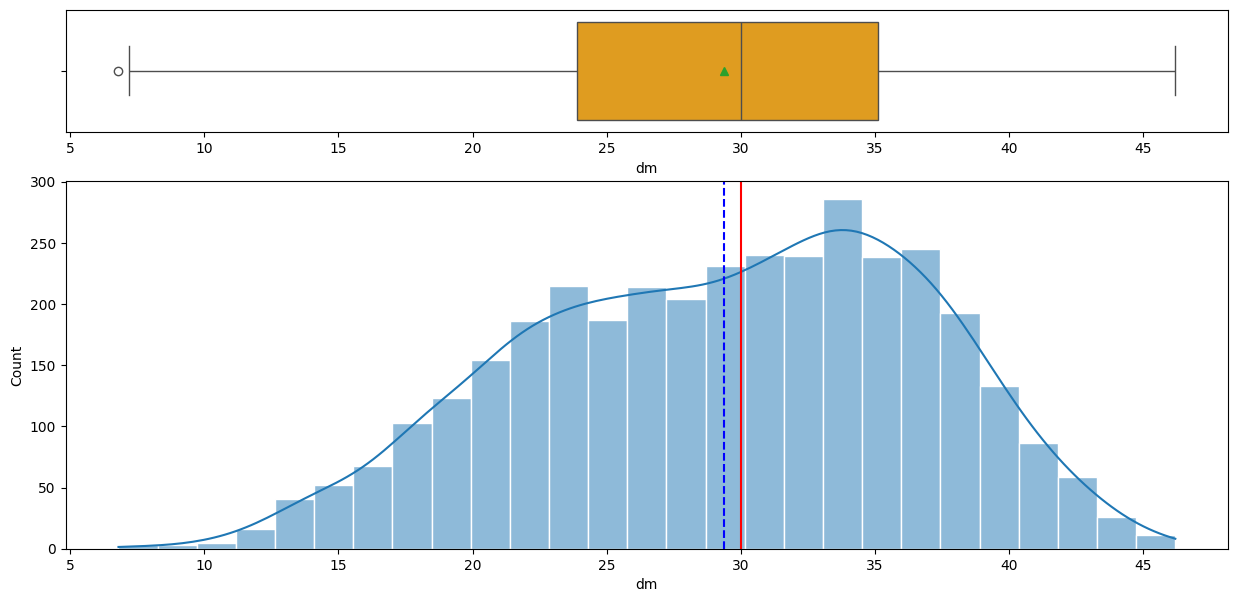

In [13]:
histogram_boxplot(df1.dm)

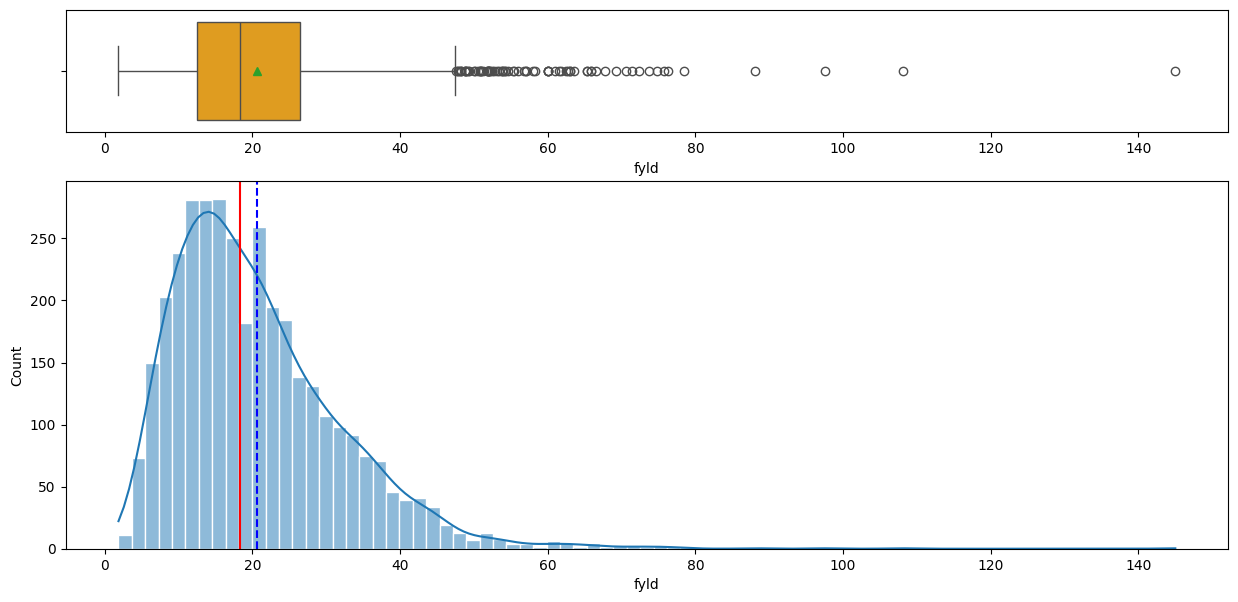

In [ ]:
histogram_boxplot(df1.fyld)

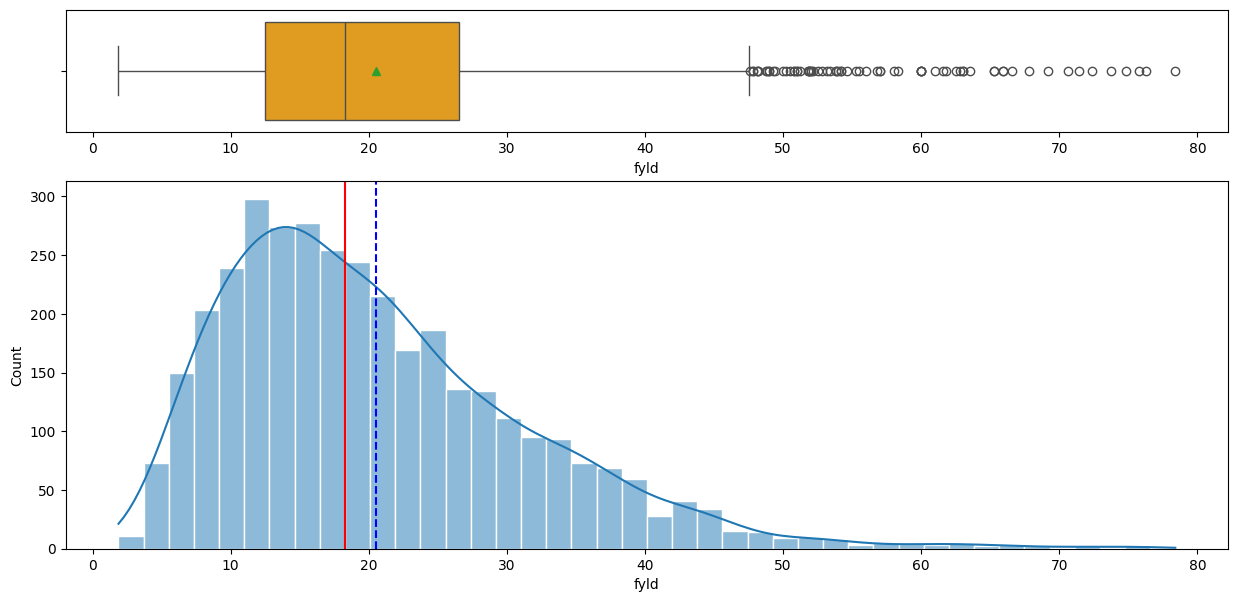

In [14]:
## Remove unwanted and extreme fyld outliers from data

df1 = df1[df1['fyld'] <= 80]
histogram_boxplot(df1.fyld)

In [17]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data, palette='twilight')

    total = len(feature) # length of the column
    for p in ax.patches:
        # percentage of each class of the category
        percentage = 100 * p.get_height()/total
        percentage_label = f"{percentage:.1f}%"
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height() + 100          # hieght of the plot
        ax.annotate(percentage_label, (x, y), size = 12) # annotate the percantage

    plt.title("Locations")
    plt.show()

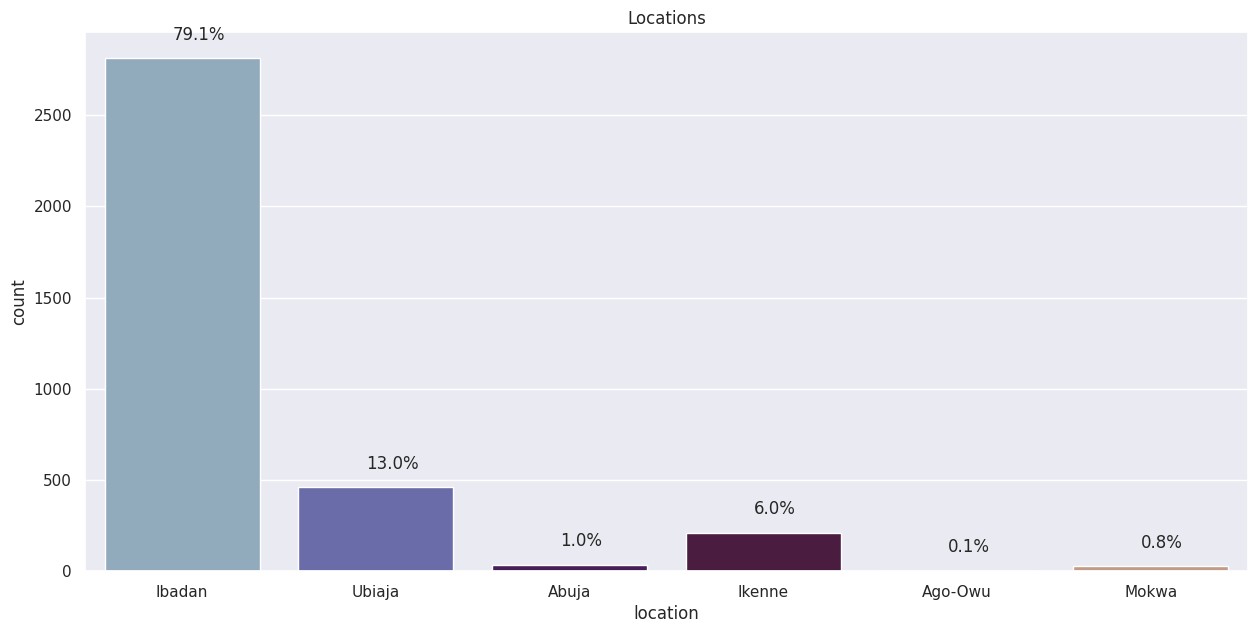

In [18]:
perc_on_bar(df1.location)

In [19]:
cassava_unique_accessions = df1.groupby("accession").mean().drop(columns=["year","tyld","dyld","dmspg"]).reset_index()
cassava_unique_accessions.columns

TypeError: Could not convert 2011-May-172011-May-172011-May-172012-July-172012-July-172012-July-172012-July-172012-June-122012-June-122012-June-122012-June-132012-June-132012-June-132012-June-132013-June-242013-June-242013-June-242013-June-242013-July-062013-July-062014-July-042014-July-042014-July-042014-July-04 to numeric

In [20]:
# time series and forcasting (fyld and dm)
from datetime import datetime

df2 = df.copy().dropna(subset = "plantingDate")
df2['planting_month'] = pd.to_datetime(df2['plantingDate'])
df2["year_month"] = [full_date.strftime('%Y-%m-%d') for full_date in df2['planting_month']]
df2.drop(columns = ["year","planting_month",'plantingDate'])

df2 = df2.groupby(["year_month","location"]).mean().reset_index()[["year_month", "location", "dm", "fyld"]].sort_values(by = "year_month")
df2.sample(3)


TypeError: Could not convert IITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITAIITA to numeric

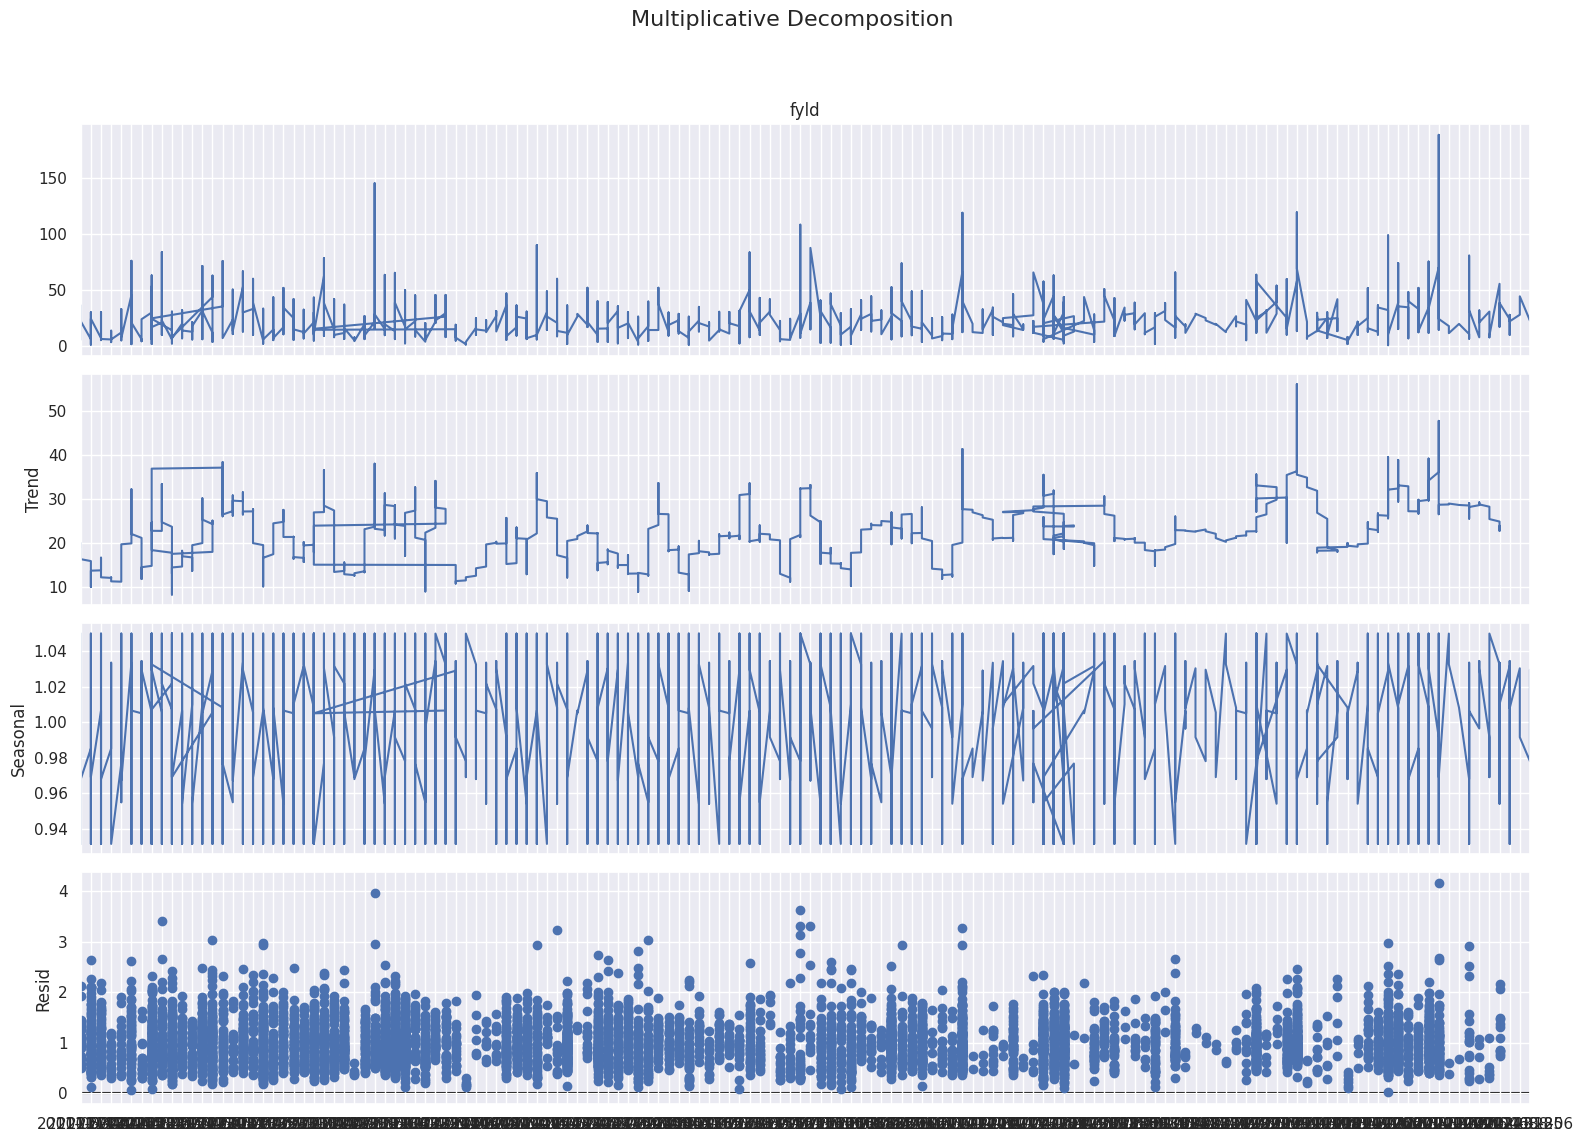

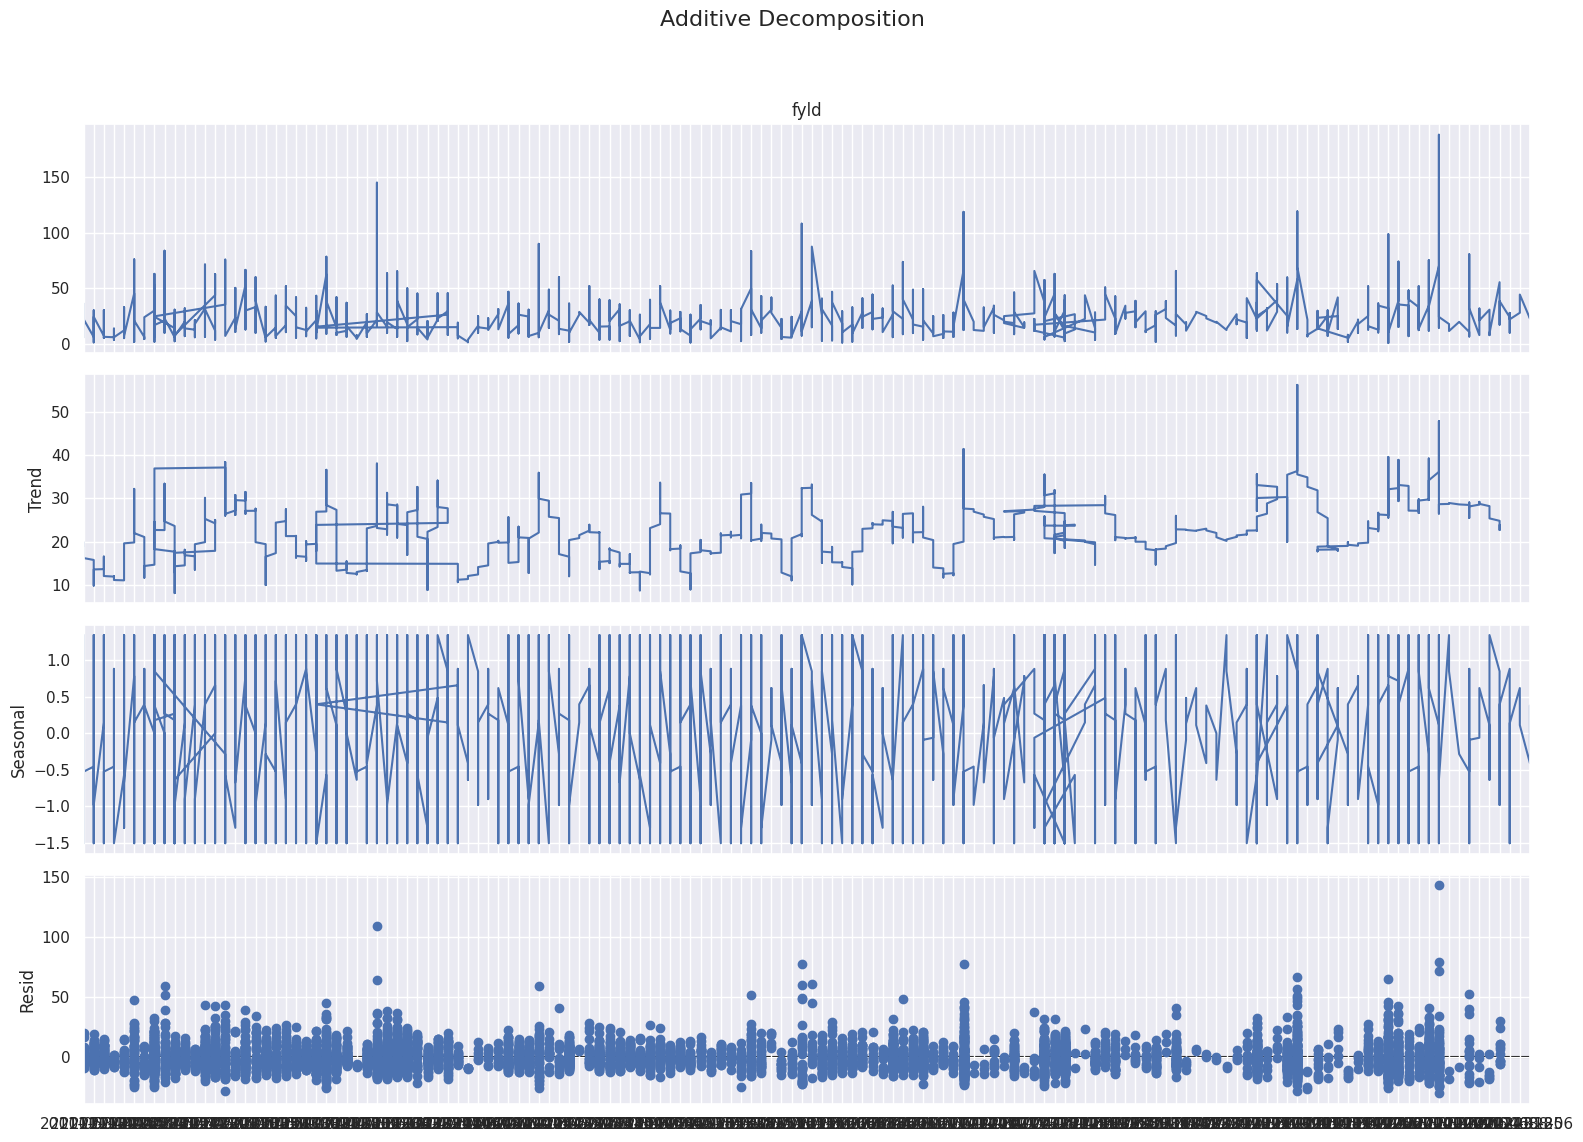

In [21]:
from dateutil.parser import parse
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing

df3 = df2.copy()
df3 = df3[["year_month","fyld"]]

try:
  df3.set_index("year_month", inplace= True)
except:
  print("year_month already set")

multiplicative_decomposition = seasonal_decompose(df3['fyld'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df3['fyld'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


Text(0, 0.5, 'Fresh Yield')

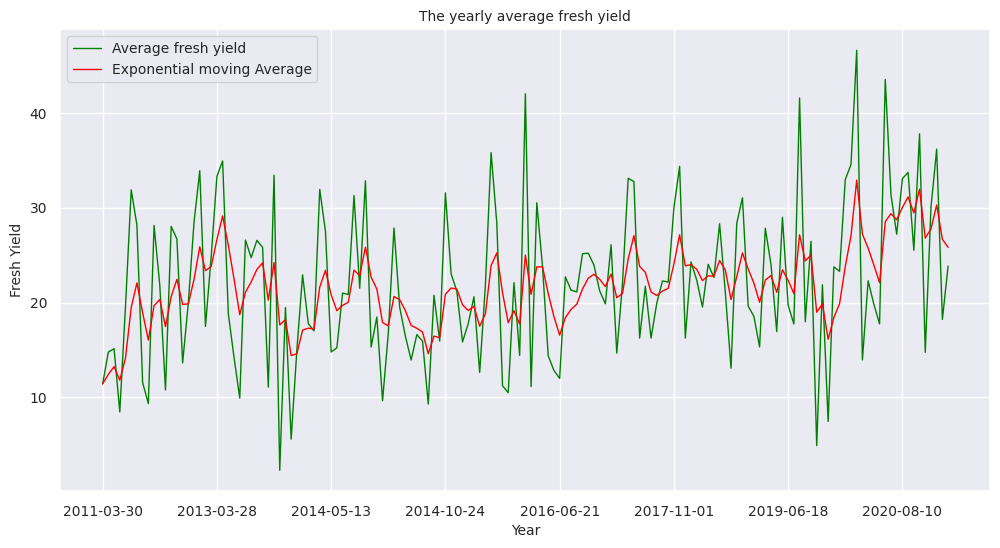

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing

df3 = df2.copy()
df3 = df3[["year_month","fyld"]]

try:
  df3.set_index("year_month", inplace= True)
except:
  print("year_month already set")


# SMA over a period of 7 and 14 years
fit1 = ExponentialSmoothing(np.asarray(df3['fyld']) ,seasonal_periods=11 ,trend='add', seasonal='add',).fit()
df3['SMA_14'] = df3.fyld.ewm(alpha=0.3, adjust=False).mean()

# Grean = Avg Air Temp, RED = 10 yrs, ORANG colors for the line plot
colors = ['green', 'red']
# Line plot
df3.plot(color=colors, linewidth=1, figsize=(12,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(labels =['Average fresh yield', 'Exponential moving Average'], fontsize=10)
plt.title('The yearly average fresh yield', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Fresh Yield', fontsize=10)



Text(0, 0.5, 'Fresh Yield')

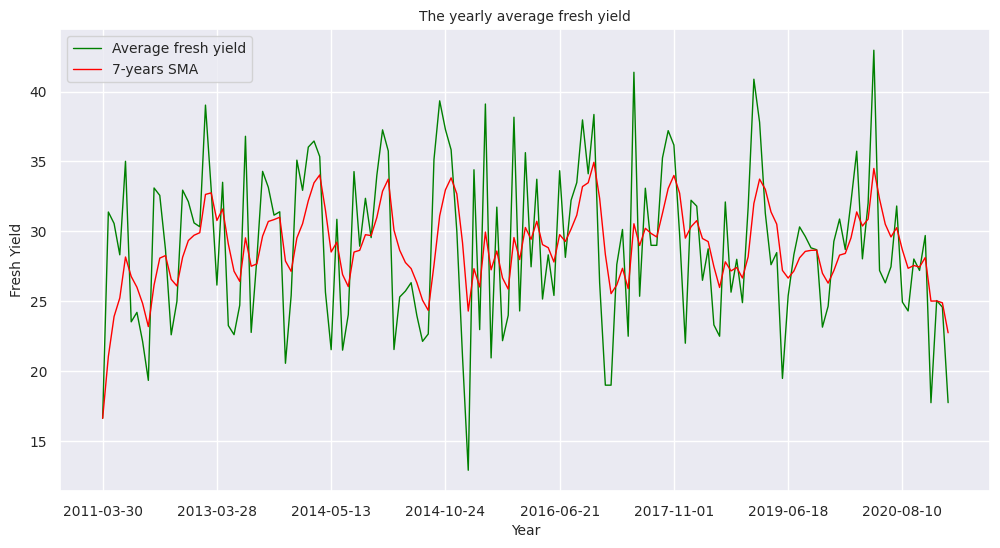

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing

df3 = df2.copy()
df3 = df3[["year_month","dm"]]

try:
  df3.set_index("year_month", inplace= True)
except:
  print("year_month already set")


# SMA over a period of 7 and 14 years
df3['SMA_14'] = df3.dm.ewm(alpha=0.3, adjust=False).mean()

# Grean = Avg Air Temp, RED = 10 yrs, ORANG colors for the line plot
colors = ['green', 'red']
# Line plot
df3.plot(color=colors, linewidth=1, figsize=(12,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(labels =['Average fresh yield', '7-years SMA', '14-years SMA'], fontsize=10)
plt.title('The yearly average fresh yield', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Fresh Yield', fontsize=10)

In [ ]:
# Encode categorical variables

label_encoder = LabelEncoder()
df1 = df1[df1['location'] == "Ibadan"]
df1 = df1.drop(columns = "location")
# df1["location"] = label_encoder.fit_transform(df1['location'])
df1["accession"] = label_encoder.fit_transform(df1['accession'])
df1["plotname"] = label_encoder.fit_transform(df1['plotname'])
df1["entryType"] = label_encoder.fit_transform(df1['entryType'])

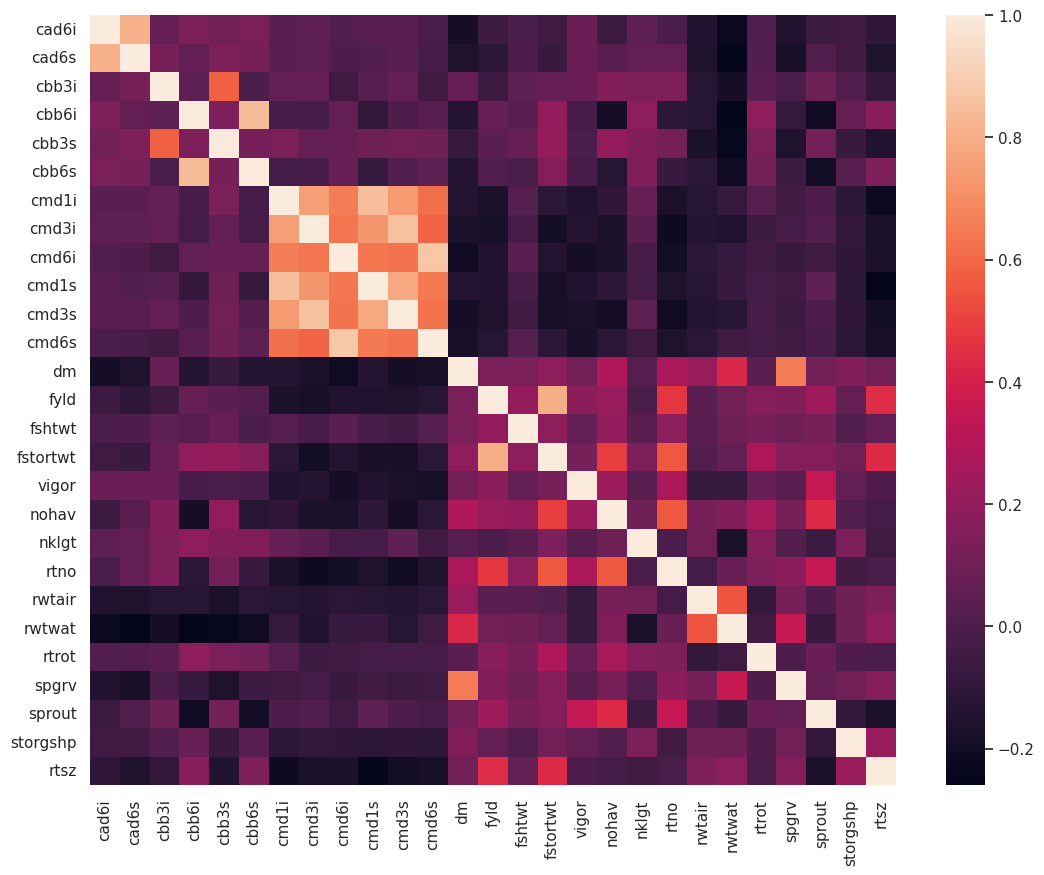

In [ ]:
cassava_numeric = cassava_unique_accessions._get_numeric_data()
cassava_corr = round(cassava_numeric.corr(), 2)
plt.figure(figsize=(13,10))
ax = sns.heatmap(cassava_corr, annot=False)
plt.show(ax)

In [ ]:
# Separate features and target variable
X = cassava_numeric.drop(columns = ['fyld','dm'], axis=1)  # Features
y = cassava_numeric[['fyld','dm']]  # Target variable

# Calculate the correlation matrix
corr_matrix = X.corr()

# Create a mask to ignore self-correlation (diagonal elements)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Filter out highly correlated features
threshold = 0.7  # Define your threshold for correlation
corr_matrix_filtered = corr_matrix.mask(mask).abs()  # Exclude diagonal elements and take absolute values
highly_correlated_features = [column for column in corr_matrix_filtered.columns if any(corr_matrix_filtered[column] > threshold)]
print(highly_correlated_features)
X_selected = X.drop(columns=highly_correlated_features)
X_selected.columns

['cad6i', 'cbb6i', 'cmd1i', 'cmd3i', 'cmd6i', 'cmd1s']


Index(['cad6s', 'cbb3i', 'cbb3s', 'cbb6s', 'cmd3s', 'cmd6s', 'fshtwt',
       'fstortwt', 'vigor', 'nohav', 'nklgt', 'rtno', 'rwtair', 'rwtwat',
       'rtrot', 'spgrv', 'sprout', 'storgshp', 'rtsz'],
      dtype='object')

,cad6s,cbb3i,cbb3s,cbb6s,cmd3s,cmd6s,fshtwt,fstortwt,vigor,nohav,nklgt,rtno,rwtair,rwtwat,rtrot,spgrv,sprout,storgshp,rtsz
0,1.500000,0.445833,1.750000,1.666667,1.000000,1.000000,19.987500,26.016667,5.583333,11.500000,3.000000,64.791667,4.647000,0.315167,3.541667,1.074583,0.825000,2.041667,4.500000
1,1.782609,0.434783,1.608696,1.521739,1.086957,1.000000,26.269565,25.578261,4.826087,9.782609,3.347826,51.695652,4.612043,0.413522,2.565217,1.103043,0.695652,2.130435,5.347826
2,1.500000,0.412500,1.625000,1.625000,1.250000,1.083333,24.900000,31.800000,5.416667,13.041667,3.083333,75.500000,4.643167,0.446750,2.541667,1.104583,0.912500,2.000000,4.666667
3,1.565217,0.217391,1.434783,1.826087,1.000000,1.000000,13.778261,26.234783,5.608696,11.391304,3.173913,57.478261,4.575739,0.477435,2.130435,1.113043,0.900000,2.304348,3.913043
4,1.347826,0.473913,1.478261,1.695652,1.000000,1.000000,17.278261,30.108696,5.173913,11.521739,3.260870,63.434783,4.390261,0.402913,1.565217,1.103478,0.860870,2.130435,4.478261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1.000000,0.900000,2.000000,2.333333,1.666667,1.000000,19.633333,24.033333,5.000000,9.666667,5.000000,45.333333,4313.200000,176.333333,0.666667,1.000000,0.966667,2.333333,5.000000
995,1.000000,0.200000,2.000000,1.000000,1.000000,1.000000,20.000000,10.550000,4.000000,10.000000,3.000000,87.500000,4076.000000,229.350000,0.000000,1.100000,0.950000,1.000000,3.000000
996,1.500000,1.000000,2.000000,1.000000,1.000000,1.000000,20.300000,19.650000,5.000000,10.000000,3.000000,95.500000,4347.000000,267.450000,5.000000,1.100000,0.900000,1.000000,4.000000
997,2.500000,0.400000,2.000000,1.000000,1.000000,1.000000,15.750000,14.750000,4.000000,10.000000,3.000000,63.500000,4257.000000,200.450000,0.000000,1.050000,0.850000,2.000000,4.000000


ValueError: x and y must have same first dimension, but have shapes (21,) and (18,)

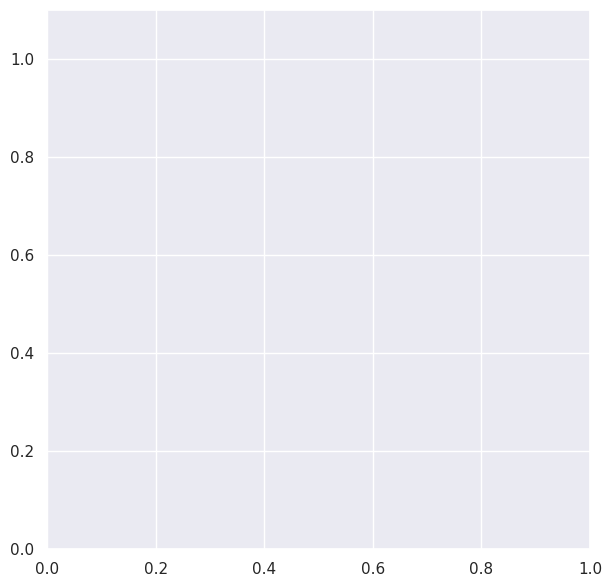

In [ ]:
## Feature selection using PCA to get the optimal number of features
features = cassava_unique_accessions.drop(columns=["accession","dm","fyld"])
# features = cassava_unique_accessions[features]
target = cassava_unique_accessions[["fyld", "dm"]]

features = StandardScaler().fit_transform(features)
pca = PCA(.95)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents)

fig, ax = plt.subplots(figsize=(7,7))
xi = np.arange(1, 22, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='darkblue')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 22, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.85, color='gray', linestyle='-')
plt.text(0.5, 0.75, '85% cut-off threshold', color = '#080808', fontsize=12)

ax.grid(axis='y')
plt.show(ax)



In [ ]:
w_df = weather_data.copy()
w_df.columns = [cols.lower() for cols in w_df.columns]
w_df = w_df.drop(columns=["allsky_sfc_sw_dwn","clrsky_sfc_sw_dwn"]).replace(-999.0, np.nan).dropna()

w_df['date'] = w_df[['year', 'mo', 'dy']].astype('str').agg('/'.join, axis=1)
w_df_cleaned = w_df.drop(columns = ['year','mo','dy'])

In [ ]:
cassava_unique_accessions.head(3)

In [ ]:
features = StandardScaler().fit_transform(features)
pca = PCA(.95)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, target], axis = 1)
finalDf

In [ ]:
# @title 0 vs 1

from matplotlib import pyplot as plt
finalDf.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {
            'estimator__fit_intercept': [True, False]
        }
    },
    'Ridge Regression': {
        'model': Ridge(),
        'params': {
            'estimator__alpha': [0.01, 0.1, 1, 10, 100],
            'estimator__fit_intercept': [True, False]
        }
    },
    'Lasso Regression': {
        'model': Lasso(),
        'params': {
            'estimator__alpha': [0.01, 0.1, 1, 10, 100],
            'estimator__fit_intercept': [True, False]
        }
    },
    'Decision Tree Regressor': {
        'model': DecisionTreeRegressor(),
        'params': {
            'estimator__max_depth': [3, 5, 10],
            'estimator__min_samples_split': [2, 5, 10],
            'estimator__min_samples_leaf': [2, 5, 10]
        }
    },
    'Random Forest Regressor': {
        'model': RandomForestRegressor(),
        'params': {
            'estimator__n_estimators': [50, 100, 200],
            'estimator__max_depth': [3, 5, 10],
            'estimator__min_samples_split': [2, 5, 10],
            'estimator__min_samples_leaf': [2, 5, 10]
        }
    },
    'Gradient Boosting Regressor': {
        'model': GradientBoostingRegressor(),
        'params': {
            'estimator__n_estimators': [50, 100, 200],
            'estimator__max_depth': [3, 5, 10],
            'estimator__min_samples_split': [2, 5, 10],
            'estimator__min_samples_leaf': [2, 5, 10]
        }
    },
    'xgb': {
        'model' : xgb.XGBRegressor(),
        'params': {
            'estimator__objective': ['reg:squarederror'],
            'estimator__eval_metric': ['rmse'],
            'estimator__eta': [0.01, 0.05, 0.1],
            'estimator__max_depth': [3, 6, 9],
            'estimator__subsample': [0.8, 0.9, 1.0],
            'estimator__colsample_bytree': [0.8, 0.9, 1.0]
        }
    },
    'lgm' : {
        'model': lgb.LGBMRegressor(),
        'params': {
            'estimator__learning_rate': [0.01, 0.05, 0.1],
            'estimator__num_leaves': [31, 50, 100],
            'estimator__n_estimators': [50, 100, 200],
            'estimator__verbose': [0],
            'estimator__feature_fraction': [0.8, 1.0]
        }
    },
    'Support Vector Regressor': {
        'model': SVR(),
        'params':{
            'estimator__kernel': ['linear', 'rbf'],
            'estimator__C': [0.1, 1, 10],
            'estimator__gamma': ['scale', 'auto']
        }
    }
}

In [ ]:
class MachineLearningModels:

    def __init__(self, data, models, grid=True):

        features = data.columns[0:-2]
        features = data[features]
        target = data[["fyld", "dm"]]
        self.X_train, self.X_test, self.y_train,self.y_test = train_test_split(
            features, target, test_size=0.2, random_state=234
        )

        self.models = models
        self.grid = grid
        self.best_params = {}

    def fit_and_tune(self):
        for name, model in self.models.items():
            print("="*50)
            print(f"Fitting and tuning {name}")
            print("="*50)
            multiregres = MultiOutputRegressor(model['model'])
            if self.grid:
              print("GridSearch")
              search = GridSearchCV(multiregres, model['params'], cv=5, scoring='neg_mean_squared_error', random_state = 234, verbose=0)
            else:
              print("Using RandomSearchCV")
              search = RandomizedSearchCV(multiregres, model['params'], n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=234, verbose=0)

            gr_search = search.fit(self.X_train, self.y_train)
            print('Best Parameters = {}'.format(gr_search.best_params_))

            self.best_params[name] = gr_search.best_estimator_
            # self.best_params = gr_search.estimators_[0].best_params_
            # print(self.best_params)
            best_score = np.sqrt(-search.best_score_)
            print(f"Best parameters: {self.best_params}")
            print(f"Best score: {best_score}")

    def evaluate(self):
        model_results = []
        for name, model in self.models.items():
            print(f"Evaluating {name}...")

            y_pred = self.best_params[name].predict(self.X_test)

            mse_y1 = mean_squared_error(self.y_test['fyld'], y_pred[:, 0])
            mse_y2 = mean_squared_error(self.y_test['dm'], y_pred[:, 1])
            r2_y1 = r2_score(self.y_test['fyld'], y_pred=y_pred[:,0])
            r2_y2 = r2_score(self.y_test['dm'], y_pred=y_pred[:,1])

            model_results.append({"name":name, "mse_y1": mse_y1, "mse_y2": mse_y2, "r2_y1": r2_y1, "r2_y2": r2_y2})
        return model_results


In [ ]:
fit_ml_models = MachineLearningModels(data=finalDf, models=models, grid=False)
fit_ml_models.fit_and_tune()
rnd_model_results = fit_ml_models.evaluate()


# grid_fit_ml_models = MachineLearningModels(data = finalDf, models=models, grid=True)
# grid_fit_ml_models.fit_and_tune()
# grid_model_results = grid_fit_ml_models.evaluate()

In [ ]:
pd.DataFrame(rnd_model_results)

In [ ]:
# Best model discovered is light gm with an R2 value of .36

# Now we fit our model properly using lgm

# Assuming X_train, y_train are your training data with two target variables (y1, y2)
features = finalDf.columns[0:-2]
features = finalDf[features]
target_1 = finalDf[["fyld"]]
target_2 = finalDf[["dm"]]


X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(
    features, target_1, target_2, test_size=0.2, random_state=42
)

# Create LightGBM datasets for each target variable
train_data_y1 = lgb.Dataset(X_train, label=y1_train)
train_data_y2 = lgb.Dataset(X_train, label=y2_train)

# Set hyperparameters
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction': 1,
    'verbose': 0
}

# Train the models
num_round = 100
bst_y1 = lgb.train(params, train_data_y1, num_round)
bst_y2 = lgb.train(params, train_data_y2, num_round)

# Predict on the test set
y_pred_lgb_y1 = bst_y1.predict(X_test)
y_pred_lgb_y2 = bst_y2.predict(X_test)

# Evaluate the models
mse_lgb_y1 = mean_squared_error(y1_test, y_pred_lgb_y1)
r2_lgb_y1 = r2_score(y1_test, y_pred_lgb_y1)
mse_lgb_y2 = mean_squared_error(y2_test, y_pred_lgb_y2)
r2_lgb_y2 = r2_score(y2_test, y_pred_lgb_y2)

print(f'Mean Squared Error (LightGBM) for Target Variable 1: {mse_lgb_y1}')
print(f'Mean Squared Error (LightGBM) for Target Variable 2: {mse_lgb_y2}')
print(f'r2 score (LightGBM) for Target Variable 1: {r2_lgb_y1}')
print(f'r2 score (LightGBM) for Target Variable 2: {r2_lgb_y2}')


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l1, l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam

features = finalDf.columns[1:-2]
features = finalDf[features]
target = finalDf[['fyld','dm']]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=234)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l1(0.01)))
model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dense(2, kernel_regularizer=l2(0.001)))  # Output layer with 2 neurons for two target variables
model.compile(optimizer=Adam(learning_rate=.005), loss='mean_squared_error')

# Train the model
y1_model = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
fyld_pred = list(y_pred.T[0])
dm_pred = list(y_pred.T[1])

fyld_test = list(y_test["fyld"])
dm_test = list(y_test["dm"])

print(r2_score(dm_pred, dm_test))
print(r2_score(fyld_pred, fyld_test))
print(mean_squared_error(dm_pred, dm_test))
print(mean_squared_error(fyld_pred, fyld_test))

In [ ]:
cassava_unique_accessions